Setup + Upload + Load Data

In [1]:
# Step 1: Install and Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

# Step 2: Upload the CSV file
from google.colab import files
uploaded = files.upload()

 # Step 3: Load the dataset (Validate if file was uploaded)
if 'sales_and_profit_trends.csv' in uploaded:
    df = pd.read_csv(io.BytesIO(uploaded['sales_and_profit_trends.csv']))
    print("Dataset loaded successfully!")
else:
    raise ValueError("Please upload the 'sales_and_profit_trends.csv' file.")
# Step 4: Quick view of data dimensions
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")


Saving sales_and_profit_trends.csv to sales_and_profit_trends.csv
Dataset loaded successfully!
Number of rows: 1198, Number of columns: 21


Basic EDA

🔹 First 5 Rows of the Dataset:

🔹 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          1198 non-null   int64  
 1   Order ID        1198 non-null   object 
 2   Order Date      1198 non-null   object 
 3   Ship Date       1198 non-null   object 
 4   Ship Mode       1198 non-null   object 
 5   Customer ID     1198 non-null   object 
 6   Customer Name   1198 non-null   object 
 7   Segment         1198 non-null   object 
 8   Country/Region  1198 non-null   object 
 9   City            1198 non-null   object 
 10  State           1198 non-null   object 
 11  Postal Code     1198 non-null   int64  
 12  Region          1198 non-null   object 
 13  Product ID      1198 non-null   object 
 14  Category        1198 non-null   object 
 15  Sub-Category    1198 non-null   object 
 16  Product Name    1198 non-null   o

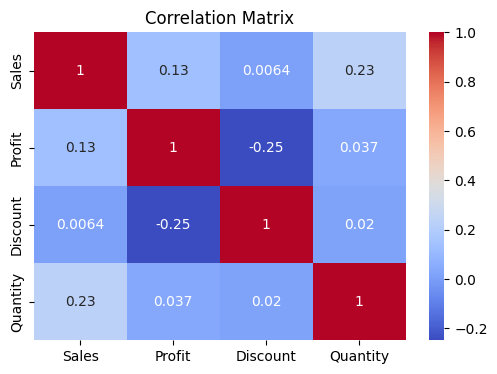

In [2]:
# Step 5: Preview the first 5 rows
print("🔹 First 5 Rows of the Dataset:")
df.head()
#display(df.head())

# Step 6:Data types and non-null counts
print("\n🔹 Data Info:")
df.info()

# Step 7: Check for missing values
print("\n🔹 Missing Values per Column:")
print(df.isnull().sum())

# Step 8: Check data types of each column
print("\n🔹 Data Types of Columns:")
print(df.dtypes)

# Step 9: Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\n🔹 Number of Duplicate Rows: {duplicate_rows}")

# Step 10: Basic Statistical Summary
numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
print("\n🔹 Statistical Summary (Numerical Columns):")
print(df[numerical_cols].describe())

# Step 11: Quick check: Unique values in categorical columns
print("\n🔹 Unique Values per Column (Quick View):")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Step 12: Core KPIs Summary
print("\n🔹 Core KPIs Overview:")
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()
total_customers = df['Customer ID'].nunique()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Unique Orders: {total_orders}")
print(f"Total Unique Customers: {total_customers}")

# Step 13: Correlation Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Sales', 'Profit', 'Discount', 'Quantity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




Parse and Prepare Data

✅ Invalid country data removed.

🔹 Unique Values per Column (Post-Cleaning):
Order ID: 569 unique values
Ship Mode: 4 unique values
Customer ID: 405 unique values
Customer Name: 407 unique values
Segment: 3 unique values
Country/Region: 1 unique values
City: 198 unique values
State: 41 unique values
Region: 4 unique values
Product ID: 876 unique values
Category: 3 unique values
Sub-Category: 17 unique values
Product Name: 870 unique values


<ipython-input-3-75d74e98b3c4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
<ipython-input-3-75d74e98b3c4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)
<ipython-input-3-75d74e98b3c4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

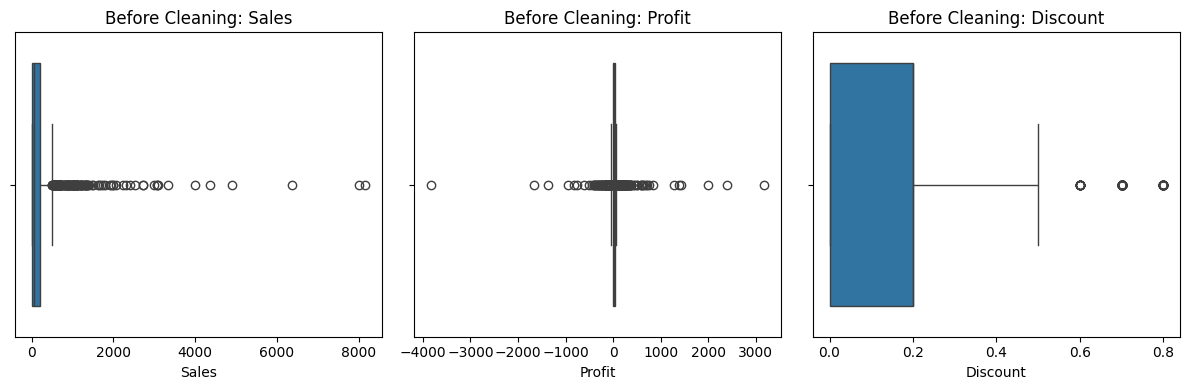

 Outliers removed from Sales, Profit, and Discount.


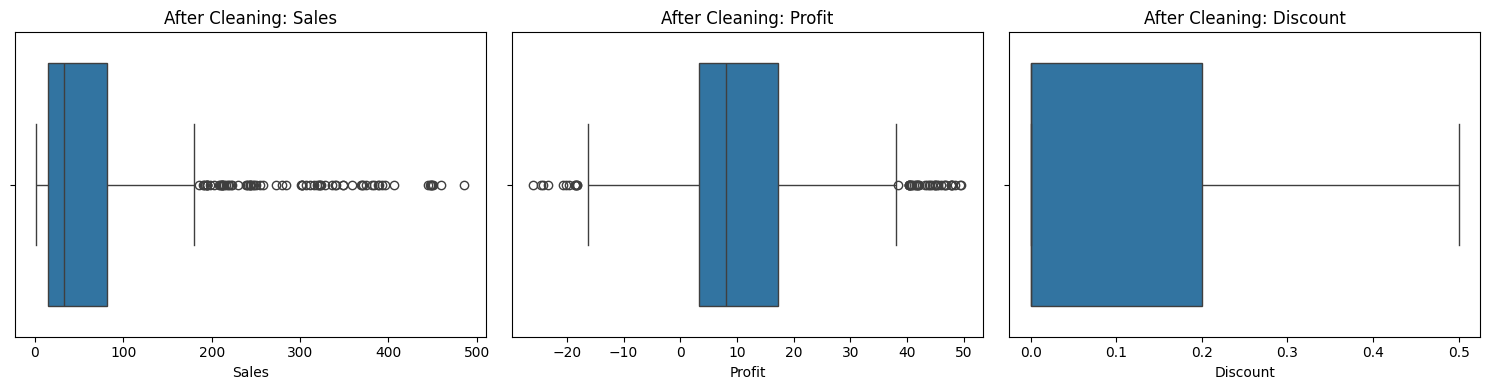

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Cleaned dataset exported and ready for Power BI.


In [3]:
# Step 14: Remove rows with invalid 'Country/Region' values
df = df[df['Country/Region'].notnull() & (df['Country/Region'] != 'asas')]
print("Invalid country data removed.")

# Step 15: Format date columns
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

# Step 16: Extract temporal features for trend analysis
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Quarter'] = df['Order Date'].dt.to_period('Q')

# Step 17: Quick re-check of categorical uniqueness
print("\n🔹 Unique Values per Column (Post-Cleaning):")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Step 18: Outlier Detection - Before Fixing (Boxplots)
plt.figure(figsize=(12, 4))
for i, col in enumerate(['Sales', 'Profit', 'Discount']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Before Cleaning: {col}')
plt.tight_layout()
plt.show()

# Step 19: Outlier Removal using IQR Method

def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower) & (dataframe[column] <= upper)]

df = remove_outliers_iqr(df, 'Sales')
df = remove_outliers_iqr(df, 'Profit')
df = remove_outliers_iqr(df, 'Discount')

print(" Outliers removed from Sales, Profit, and Discount.")

# Step 20: Outlier Check - After Fixing (Boxplots)
plt.figure(figsize=(15, 4))
for i, col in enumerate(['Sales', 'Profit', 'Discount']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'After Cleaning: {col}')
plt.tight_layout()
plt.show()

# Step 21: Export Cleaned Data for Power BI
df.to_csv('cleaned_sales_data.csv', index=False)
from google.colab import files
files.download('cleaned_sales_data.csv')

print(" Cleaned dataset exported and ready for Power BI.")



Analyze Business Insights

In [4]:
import pandas as pd

# Step 22: Total Sales and Profit per State
state_performance = df.groupby('State')[['Sales', 'Profit']].agg(['sum', 'mean', 'std']).reset_index()
state_performance[('Sales', 'std')] = state_performance[('Sales', 'std')].fillna(0)
state_performance[('Profit', 'std')] = state_performance[('Profit', 'std')].fillna(0)
state_performance['Single_Record'] = state_performance[('Sales', 'std')].apply(lambda x: 'Single Record' if x == 0 else 'Multiple Records')
print("🔹 Sales and Profit per State:")
print(state_performance)

# Step 23: Total Sales and Profit per City
city_performance = df.groupby('City')[['Sales', 'Profit']].agg(['sum', 'mean', 'std']).reset_index()
city_performance[('Sales', 'std')] = city_performance[('Sales', 'std')].fillna(0)
city_performance[('Profit', 'std')] = city_performance[('Profit', 'std')].fillna(0)
city_performance['Single_Record'] = city_performance[('Sales', 'std')].apply(lambda x: 'Single Record' if x == 0 else 'Multiple Records')
print("🔹 Sales and Profit per City:")
print(city_performance)

# Step 24: Regional Sales and Profit Analysis
region_performance = df.groupby('Region')[['Sales', 'Profit']].agg(['sum', 'mean', 'std']).reset_index()
region_performance[('Sales', 'std')] = region_performance[('Sales', 'std')].fillna(0)
region_performance[('Profit', 'std')] = region_performance[('Profit', 'std')].fillna(0)
region_performance['Single_Record'] = region_performance[('Sales', 'std')].apply(lambda x: 'Single Record' if x == 0 else 'Multiple Records')
print("🔹 Sales and Profit per Region:")
print(region_performance)

# Step 25: Sales and Profit by Category and Segment
category_segment_perf = df.groupby(['Category', 'Segment'])[['Sales', 'Profit']].sum().reset_index()
print("🔹 Sales and Profit by Category and Segment:")
print(category_segment_perf)

# Step 26: Top 3 Products by Sales per State
top_products_state = df.groupby(['State', 'Product Name'])['Sales'].sum().reset_index()
top_products_state = top_products_state.sort_values(['State', 'Sales'], ascending=[True, False])
top_3_products_per_state = top_products_state.groupby('State').head(3)
print("🔹 Top 3 Products per State:")
print(top_3_products_per_state)

# Step 27: Top 3 Products by Sales per City
top_products_city = df.groupby(['City', 'Product Name'])['Sales'].sum().reset_index()
top_products_city = top_products_city.sort_values(['City', 'Sales'], ascending=[True, False])
top_3_products_per_city = top_products_city.groupby('City').head(3)
print("🔹 Top 3 Products per City:")
print(top_3_products_per_city)

# Step 28: Top 3 Products by Sales per Country
top_products_country = df.groupby(['Country/Region', 'Product Name'])['Sales'].sum().reset_index()
top_products_country = top_products_country.sort_values(['Country/Region', 'Sales'], ascending=[True, False])
top_3_products_per_country = top_products_country.groupby('Country/Region').head(3)
print("🔹 Top 3 Products per Country:")
print(top_3_products_per_country)





🔹 Sales and Profit per State:
                   State       Sales                             Profit  \
                                 sum        mean         std        sum   
0                Alabama     39.4900   19.745000    4.249712    19.4102   
1                Arizona    878.8480   67.603692   80.355803   104.4142   
2               Arkansas     97.7700   19.554000   13.536775    34.0559   
3             California  13758.9390   77.297410   98.383847  2268.3306   
4               Colorado   1812.6800  100.704444  116.515345   151.1257   
5            Connecticut    164.7100   32.942000   40.901047    52.4672   
6               Delaware    222.6600   37.110000   20.637053    66.0906   
7   District of Columbia     22.7400   22.740000    0.000000     8.8686   
8                Florida   2550.2720   79.696000   83.967804   243.7501   
9                Georgia    503.4900   62.936250  134.063019    82.9884   
10              Illinois   2295.5430   91.821720  101.738874   142.791

Code Block 5: Visualizations & Dashboard Elements

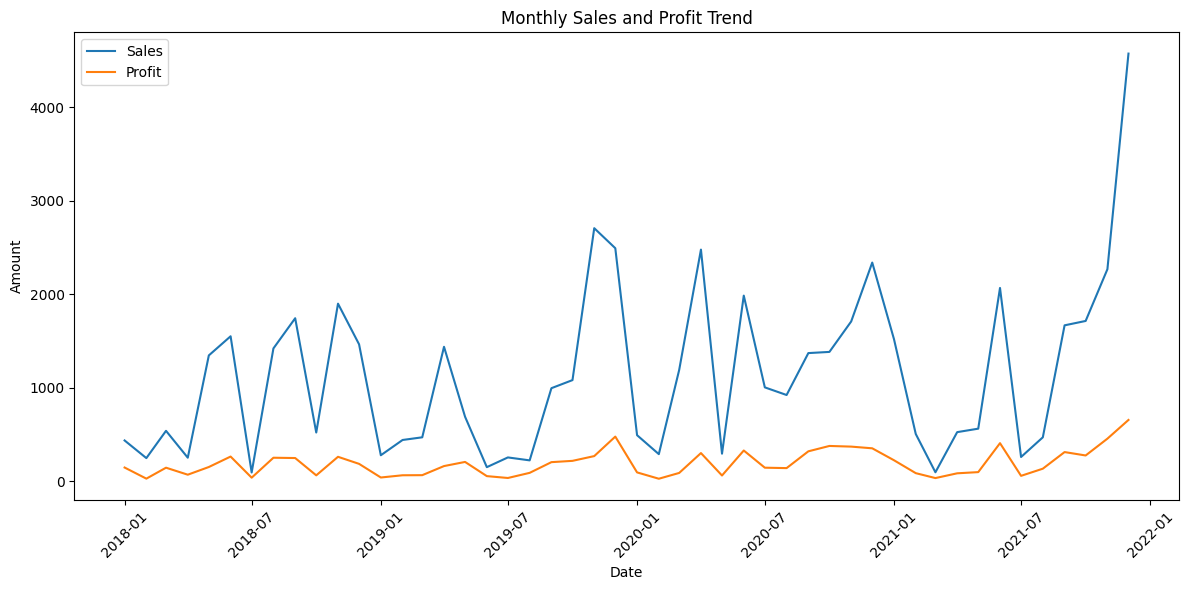

<Figure size 800x500 with 0 Axes>

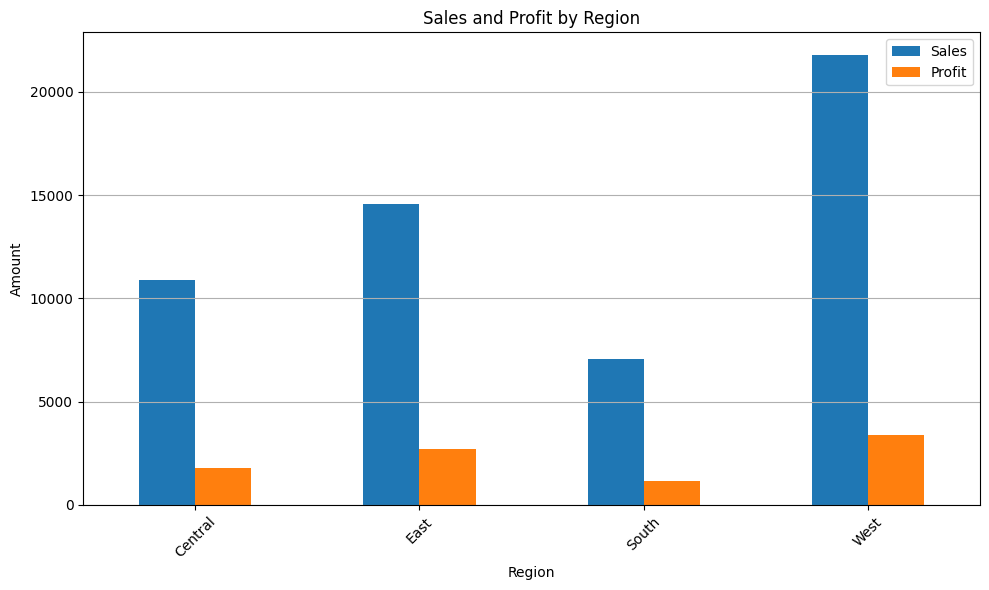

<ipython-input-5-0882394a4d3b>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='Sales', y='City', palette='viridis')


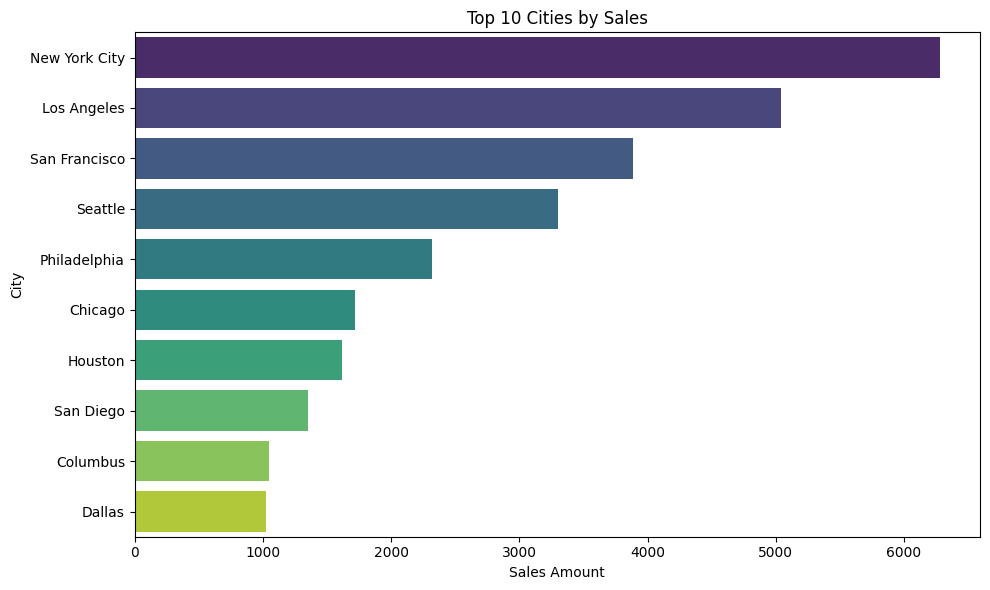

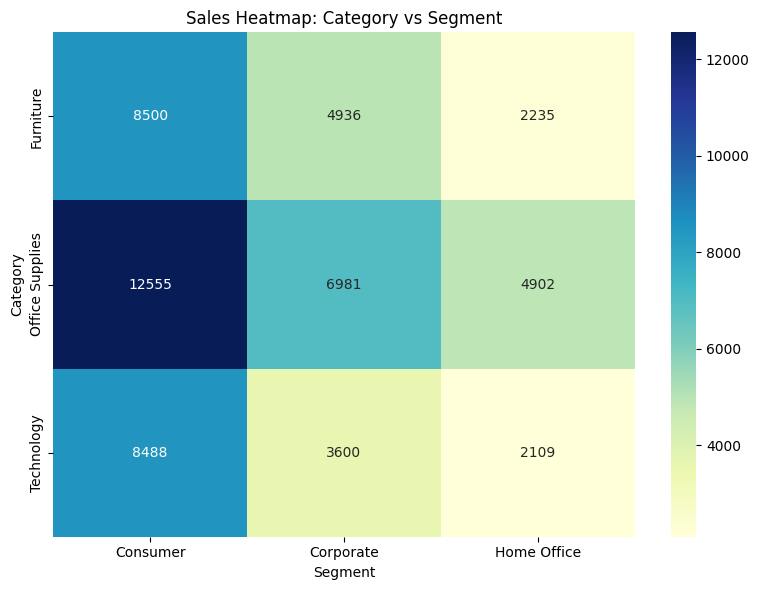

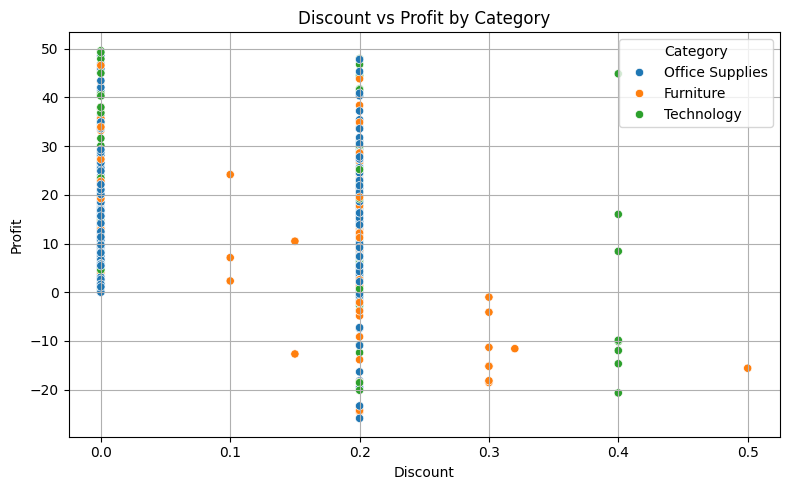

In [5]:
!pip install squarify
import squarify
import plotly.express as px

# Step 29: Sales & Profit Trend Over Time
# Monthly Sales & Profit Trend
monthly_trend = df.groupby(['Order_Year', 'Order_Month'])[['Sales', 'Profit']].sum().reset_index()
monthly_trend['Year-Month'] = pd.to_datetime(monthly_trend['Order_Year'].astype(str) + '-' + monthly_trend['Order_Month'].astype(str))

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_trend, x='Year-Month', y='Sales', label='Sales')
sns.lineplot(data=monthly_trend, x='Year-Month', y='Profit', label='Profit')
plt.title('Monthly Sales and Profit Trend')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 30: Sales & Profit by Region (Bar Chart)
region_sales = df.groupby('Region')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(8,5))
region_sales.plot(kind='bar', x='Region', y=['Sales', 'Profit'], figsize=(10,6))
plt.title('Sales and Profit by Region')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Step 31: Top 10 Cities by Sales
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=top_cities, x='Sales', y='City', palette='viridis')
plt.title('Top 10 Cities by Sales')
plt.xlabel('Sales Amount')
plt.ylabel('City')
plt.tight_layout()
plt.show()

# Step 32: Category vs Segment Heatmap
cat_seg = df.pivot_table(index='Category', columns='Segment', values='Sales', aggfunc='sum')

plt.figure(figsize=(8,6))
sns.heatmap(cat_seg, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Sales Heatmap: Category vs Segment')
plt.tight_layout()
plt.show()

# Step 33: Discount vs Profit Scatter Plot
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title('Discount vs Profit by Category')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 34:  Sunburst Chart of Sales by Category > Sub-Category
# Prepare data
sunburst_df = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
# Create sunburst chart
fig = px.sunburst(
    sunburst_df,
    path=['Category', 'Sub-Category'],
    values='Sales',
    title='Sales Distribution: Category → Sub-Category',
    color='Sales',
    color_continuous_scale='Tealgrn'
)
fig.show()


Predictive Modeling (Sales Regression)


In [6]:
# Step 1: Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 2: Select features and target
features = ['Category', 'Sub-Category', 'Region', 'Segment', 'Quantity', 'Discount', 'Profit']
target = 'Sales'

X = df[features]
y = df[target]

# Step 3: Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

# Step 4: Create preprocessing pipeline
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

# Step 5: Build full pipeline with model (Random Forest Regressor)
model = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Step 6: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Fit the model
model.fit(X_train, y_train)
print(" Model training complete.")

# Step 8: Make predictions
y_pred = model.predict(X_test)

# Step 9: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n Model Evaluation Metrics:")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


 Model training complete.

🔍 Model Evaluation Metrics:
MAE (Mean Absolute Error): 24.44
RMSE (Root Mean Squared Error): 52.25
R² Score: 0.66


Checking for overfitting

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions on training set
y_train_pred = model.predict(X_train)

# Training performance
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

print(" Training Set Performance:")
print(f"MAE: {train_mae:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"R² Score: {train_r2:.2f}")


📘 Training Set Performance:
MAE: 9.88
RMSE: 20.32
R² Score: 0.94


Cross-Validation to Evaluate Model Robustness

In [8]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 2: Select features and target
features = ['Category', 'Sub-Category', 'Region', 'Segment', 'Quantity', 'Discount', 'Profit']
target = 'Sales'

X = df[features].copy()
y = df[target].copy()

# Step 3: Drop problematic columns if they exist (e.g., date columns or Period types)
# Optionally check for any Period types and convert to string or drop
for col in X.columns:
    if pd.api.types.is_period_dtype(X[col]):
        X[col] = X[col].astype(str)

# Step 4: Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

# Step 5: Create preprocessing pipeline
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

# Step 6: Build full pipeline with model
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Step 7: Apply cross-validation
mae_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')
rmse_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_root_mean_squared_error')
r2_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')

# Step 8: Display evaluation results
print("\n Cross-Validation Results (Random Forest Regressor):")
print(f"Average MAE: {-np.mean(mae_scores):.2f}")
print(f"Average RMSE: {-np.mean(rmse_scores):.2f}")
print(f"Average R² Score: {np.mean(r2_scores):.2f}")



<ipython-input-8-4496a4cc54fb>:21: DeprecationWarning:

is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead




 Cross-Validation Results (Random Forest Regressor):
Average MAE: 26.93
Average RMSE: 54.69
Average R² Score: 0.59


Predictive Modeling (Sales XGBoost Regressor)

In [15]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.base import BaseEstimator, TransformerMixin

# Step 2: Feature engineering transformer
features = ['Category', 'Sub-Category', 'Region', 'Segment', 'Quantity', 'Discount', 'Profit']
target = 'Sales'  # Target remains 'Sales'

X = df[features].copy()
y = np.log1p(df[target].copy())  # Target is transformed


# Step 3: Preprocessing
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42))
])

# Step 4: Cross-validation
from sklearn.model_selection import cross_val_score
mae_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')
rmse_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_root_mean_squared_error')
r2_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')

# Step 5: Results
print("\n Cross-Validation Results (XGBoost Regressor):")
print(f"Average MAE: {-np.mean(mae_scores):.2f}")
print(f"Average RMSE: {-np.mean(rmse_scores):.2f}")
print(f"Average R² Score: {np.mean(r2_scores):.2f}")



 Cross-Validation Results (XGBoost Regressor):
Average MAE: 0.29
Average RMSE: 0.48
Average R² Score: 0.82
